In [4]:
import sys, os

In [20]:
root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, root)

In [6]:
from src.signals import load_prices

In [11]:
from src.robustness import vary_lookbacks, vary_tc, sector_neutral

# Load prices

In [23]:
prices = load_prices("../data/cleaned/cleaned_monthly_prices.csv")

# Look back Sensitivity

In [24]:
lb_df = vary_lookbacks(prices, lookbacks=[6,9,12,18], tc = 0.001)
display(lb_df)

,ann_return,sharpe,max_drawdown
lookback,,,
6,-0.105709,-0.563584,0.918813
9,-0.105335,-0.509429,0.925058
12,-0.102799,-0.498128,0.915774
18,-0.103709,-0.496697,0.920083


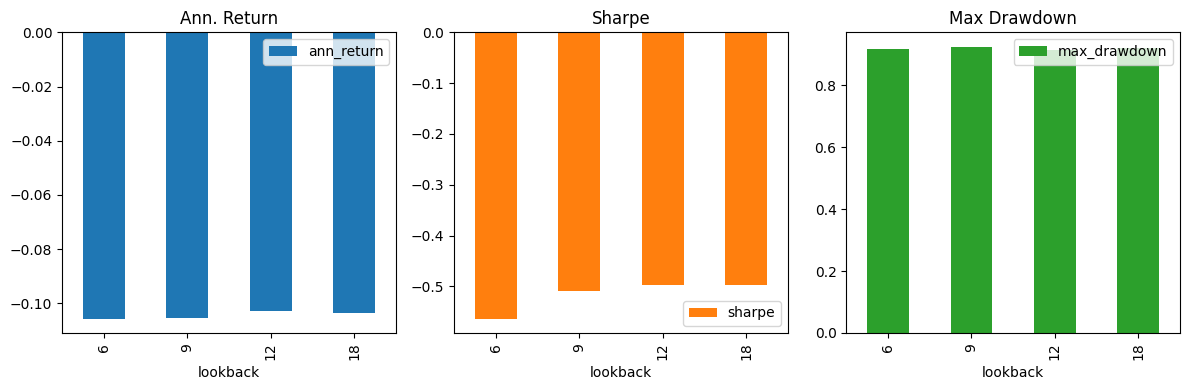

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
lb_df.plot(kind="bar", subplots=True, layout=(1,3), figsize=(12,4), 
           title=["Ann. Return", "Sharpe", "Max Drawdown"])
plt.tight_layout()

In [33]:
plt.savefig("../figures/lookback_sensitivity.png")

<Figure size 640x480 with 0 Axes>

# 3. Transaction cost senstivity

In [34]:
tc_df = vary_tc(prices, lookback=12, tcs=[0.0,0.001,0.002,0.005])

In [35]:
display(tc_df)

,ann_return,sharpe,max_drawdown
tc_bps,,,
0,-0.098474,-0.480597,0.909326
10,-0.102799,-0.498128,0.915774
20,-0.107104,-0.515583,0.921766
50,-0.119908,-0.567487,0.937315


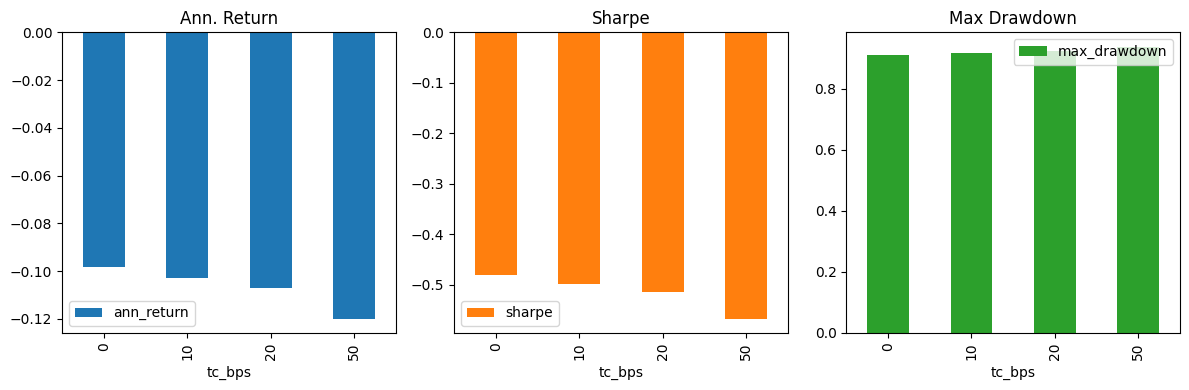

In [36]:
tc_df.plot(kind='bar', subplots=True, layout=(1,3), figsize=(12,4),
           title=["Ann. Return","Sharpe","Max Drawdown"])
plt.tight_layout()

In [37]:
plt.savefig("../figures/transaction_cost_sensitivity.png")

<Figure size 640x480 with 0 Axes>